# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Loading dataset

In [2]:
bank_data = pd.read_csv('banking.csv', header = 0)
bank_data = bank_data.dropna()
print(bank_data.shape)
bank_data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Understanding dataset

In [3]:
print('**job**')
print(bank_data['job'].unique())
print()
print('**marital**')
print(bank_data['marital'].unique())
print('**default**')
print(bank_data['default'].unique())
print()
print('**housing**')
print(bank_data['housing'].unique())
print()
print('**loan**')
print(bank_data['loan'].unique())
print()
print('**education**')
print(bank_data['education'].unique())
print()
print('**y**')
print(bank_data['y'].value_counts())

**job**
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']

**marital**
['married' 'single' 'divorced' 'unknown']
**default**
['unknown' 'no' 'yes']

**housing**
['yes' 'no' 'unknown']

**loan**
['no' 'yes' 'unknown']

**education**
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

**y**
0    36548
1     4640
Name: y, dtype: int64


# Correcting dataset

In [4]:
bank_data['education']=np.where(bank_data['education'] =='basic.9y', 'Basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.6y', 'Basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.4y', 'Basic', bank_data['education'])
bank_data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Further understanding dataset

In [5]:
bank_data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [6]:
bank_data.groupby(['job','y']).mean()

age    duration  campaign       pdays  previous  \
job           y                                                          
admin.        0  38.219846  215.093385  2.707718  981.270783  0.141125   
              1  37.968935  517.414201  2.058432  773.512574  0.510355   
blue-collar   0  39.582057  229.878018  2.588208  991.516365  0.111653   
              1  39.200627  732.673981  2.156740  899.324451  0.269592   
entrepreneur  0  41.703453  225.632883  2.579580  987.813814  0.128378   
              1  41.935484  667.540323  2.064516  910.943548  0.250000   
housemaid     0  44.705451  218.778826  2.722222  986.491614  0.089099   
              1  52.650943  535.537736  1.896226  727.367925  0.575472   
management    0  42.309707  220.828197  2.532357  984.848613  0.140986   
              1  42.783537  543.804878  2.030488  786.929878  0.533537   
retired       0  59.926128  224.263608  2.657076  960.369362  0.212286   
              1  68.253456  420.235023  1.942396  712.937788  0.668203   
self-employed 0  40.176887  222.220912  2.724843  988.073113  0.123428   
              1  38.006711  622.020134  2.114094  878.859060  0.315436   
services      0  38.090236  225.047998  2.619309  991.091607  0.136314   
              1  36.077399  634.851393  2.232198  854.479876  0.365325   
student       0  26.396667  228.851667  2.238333  924.596667  0.395000   
              1  24.800000  403.316364  1.810909  656.116364  0.807273   
technician    0  38.600033  213.452021  2.641776  985.135540  0.111093   
              1  37.746575  553.190411  2.046575  793.676712  0.505479   
unemployed    0  39.844828  212.706897  2.668966  973.879310  0.131034   
              1  39.062500  471.451389  1.930556  702.333333  0.611111   
unknown       0  45.375427  204.559727  2.679181  954.873720  0.095563   
              1  47.054054  517.756757  2.405405  810.864865  0.621622   

                 emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
job           y                                                           
admin.        0      0.224068       93.566030     -40.349768   3.786567   
              1     -1.383210       93.319537     -39.545488   1.965078   
blue-collar   0      0.303552       93.668887     -41.346565   3.835402   
              1     -0.487774       93.491480     -41.770846   2.915715   
entrepreneur  0      0.242868       93.626245     -41.319820   3.881632   
              1     -0.745161       93.381153     -40.895161   2.818839   
housemaid     0      0.641300       93.712759     -39.626834   4.243082   
              1     -1.437736       93.350934     -38.311321   1.908717   
management    0      0.141217       93.550062     -40.619992   3.785477   
              1     -1.230793       93.306631     -39.456402   2.232896   
retired       0     -0.283904       93.493273     -38.920762   3.249794   
              1     -1.926267       93.245629     -37.542857   1.348569   
self-employed 0      0.242610       93.591786     -40.501022   3.854206   
              1     -1.173154       93.288470     -40.377852   2.282242   
services      0      0.256720       93.650433     -41.327537   3.793805   
              1     -0.743034       93.456598     -40.866873   2.631139   
student       0     -1.133167       93.350790     -40.751500   2.208683   
              1     -2.007636       93.289771     -38.957091   1.176313   
technician    0      0.441693       93.584196     -39.918310   4.012318   
              1     -1.102055       93.374286     -40.003836   2.239584   
unemployed    0      0.147241       93.604369     -40.193908   3.775461   
              1     -1.676389       93.318563     -38.881944   1.600444   
unknown       0      0.555290       93.748703     -38.882594   4.154038   
              1     -1.205405       93.483270     -38.127027   2.325622   

                 nr_employed  
job           y               
admin.        0  5175.512051  
              1  5087.736760  
blue-collar   0  5178.2

In [7]:
bank_data.groupby(['marital','y']).mean()

age    duration  campaign       pdays  previous  \
marital  y                                                          
divorced 0  44.318907  219.339217  2.667311  988.922872  0.131044   
         1  49.943277  553.138655  2.144958  792.399160  0.495798   
married  0  41.964145  221.204233  2.628550  986.273933  0.118637   
         1  45.341232  577.938389  2.079779  798.956951  0.482622   
single   0  33.453458  220.417270  2.623341  977.348412  0.163249   
         1  31.348765  513.952469  1.983951  781.414815  0.506790   
unknown  0  40.397059  256.588235  3.470588  969.941176  0.220588   
         1  39.583333  630.833333  1.583333  751.000000  0.583333   

            emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
marital  y                                                           
divorced 0      0.307930       93.628370     -40.772655   3.887242   
         1     -1.086765       93.417082     -40.137185   2.224223   
married  0      0.332783       93.623935     -40.354773   3.914493   
         1     -1.135703       93.362369     -39.526659   2.253996   
single   0      0.037817       93.548650     -41.048452   3.550635   
         1     -1.431790       93.324788     -40.121914   1.885499   
unknown  0     -0.101471       93.522868     -41.548529   3.441971   
         1     -0.900000       93.178750     -36.691667   2.582417   

            nr_employed  
marital  y               
divorced 0  5179.247921  
         1  5098.157353  
married  0  5179.883783  
         1  5100.777646  
single   0  5166.602815  
         1  5085.173025  
unknown  0  5163.610294  
         1  5122.166667

In [8]:
bank_data.groupby(['education','y']).mean()

age    duration  campaign       pdays  previous  \
education           y                                                          
Basic               0  41.726453  228.103641  2.604867  987.968312  0.117034   
                    1  46.752984  629.579431  2.083563  837.555556  0.393021   
high.school         0  38.058345  222.932933  2.635549  984.135431  0.152405   
                    1  37.503395  573.205626  2.017459  801.614937  0.461688   
illiterate          0  47.571429  243.071429  2.357143  999.000000  0.071429   
                    1  51.750000  394.750000  2.000000  750.750000  0.250000   
professional.course 0  39.958262  215.589716  2.657272  985.117040  0.118546   
                    1  41.031933  541.132773  2.030252  770.541176  0.510924   
university.degree   0  38.916460  213.126119  2.643170  979.791675  0.138217   
                    1  38.644910  505.283832  2.062874  775.894012  0.532934   
unknown             0  43.356081  223.888514  2.691892  981.605405  0.138514   
                    1  44.219124  489.414343  2.031873  714.199203  0.745020   

                       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
education           y                                                           
Basic               0      0.300123       93.662898     -40.998092   3.852892   
                    1     -0.949954       93.399021     -40.188062   2.436839   
high.school         0      0.181388       93.611098     -41.051933   3.724866   
                    1     -1.188652       93.368916     -40.024830   2.167868   
illiterate          0      0.378571       93.502500     -40.514286   4.006786   
                    1     -1.925000       92.669250     -37.975000   1.800750   
professional.course 0      0.351635       93.594249     -40.148021   3.918667   
                    1     -1.222353       93.379370     -39.937311   2.083970   
university.degree   0      0.190331       93.523251     -40.049848   3.778245   
                    1     -1.401138       93.306234     -39.510359   1.967023   
unknown             0      0.331486       93.707033     -40.088649   3.885882   
                    1     -1.547012       93.373120     -38.634661   1.714996   

                       nr_employed  
education           y               
Basic               0  5177.704482  
                    1  5112.320110  
high.school         0  5173.198385  
                    1  5097.487682  
illiterate          0  5188.907143  
                    1  5111.825000  
professional.course 0  5180.360198  
                    1  5090.443025  
university.degree   0  5175.230320  
                    1  5087.766287  
unknown             0  5174.661486  
                    1  5070.443028

# Creating dummy variables

In [9]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:    
    cat_list = pd.get_dummies(bank_data[var], prefix=var)    
    data1=bank_data.join(cat_list)
    bank_data=data1

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=bank_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=bank_data[to_keep]

# Checking final variable

In [12]:
print(data_final.shape)
print(data_final.columns.values)
data_final.head()

(41188, 62)
['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed' 'y'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'marital_unknown'
 'education_Basic' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'default_no' 'default_unknown' 'default_yes'
 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no' 'loan_unknown'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed' 'poutcome_failure'
 'poutcome_nonexistent' 'poutcome_success'

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


# Fitting Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Checking Test Dataset Accuracy

In [20]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


# Checking Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10718   263]
 [  811   565]]


# ROC Curve

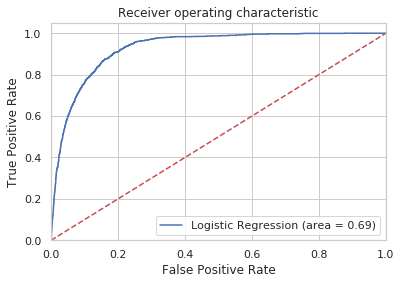

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Reference
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8